In [79]:
import numpy as np
import numpy.random as rnd
import seaborn as sns

MAP_HEIGHT = 40
MAP_WIDTH = 40

def interpolant(t):
    return t*t*t*(t*(t*6 - 15) + 10)


def generate_perlin_noise_2d(
        shape, res, seed, tileable=(False, False), interpolant=interpolant
):
    """Generate a 2D numpy array of perlin noise.
    Args:
        shape: The shape of the generated array (tuple of two ints).
            This must be a multple of res.
        res: The number of periods of noise to generate along each
            axis (tuple of two ints). Note shape must be a multiple of
            res.
        tileable: If the noise should be tileable along each axis
            (tuple of two bools). Defaults to (False, False).
        interpolant: The interpolation function, defaults to
            t*t*t*(t*(t*6 - 15) + 10).
    Returns:
        A numpy array of shape shape with the generated noise.
    Raises:
        ValueError: If shape is not a multiple of res.
    """
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0], 0:res[1]:delta[1]]\
            .transpose(1, 2, 0) % 1
    # Gradients
    rnd.seed(seed)
    angles = 2*np.pi*rnd.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    if tileable[0]:
        gradients[-1,:] = gradients[0,:]
    if tileable[1]:
        gradients[:,-1] = gradients[:,0]
    gradients = gradients.repeat(d[0], 0).repeat(d[1], 1)
    g00 = gradients[    :-d[0],    :-d[1]]
    g10 = gradients[d[0]:     ,    :-d[1]]
    g01 = gradients[    :-d[0],d[1]:     ]
    g11 = gradients[d[0]:     ,d[1]:     ]
    print(gradients)
    print(g00)
    print(g11)
    # Ramps
    n00 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]  )) * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]  )) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = interpolant(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)

In [81]:
grid = generate_perlin_noise_2d((40, 80), (4, 4), 13345, (False, False))

[[[-0.16964762 -0.98550479]
  [-0.16964762 -0.98550479]
  [-0.16964762 -0.98550479]
  ...
  [ 0.85729579  0.51482417]
  [ 0.85729579  0.51482417]
  [ 0.85729579  0.51482417]]

 [[-0.16964762 -0.98550479]
  [-0.16964762 -0.98550479]
  [-0.16964762 -0.98550479]
  ...
  [ 0.85729579  0.51482417]
  [ 0.85729579  0.51482417]
  [ 0.85729579  0.51482417]]

 [[-0.16964762 -0.98550479]
  [-0.16964762 -0.98550479]
  [-0.16964762 -0.98550479]
  ...
  [ 0.85729579  0.51482417]
  [ 0.85729579  0.51482417]
  [ 0.85729579  0.51482417]]

 ...

 [[-0.84159026  0.5401165 ]
  [-0.84159026  0.5401165 ]
  [-0.84159026  0.5401165 ]
  ...
  [ 0.99816836 -0.06049737]
  [ 0.99816836 -0.06049737]
  [ 0.99816836 -0.06049737]]

 [[-0.84159026  0.5401165 ]
  [-0.84159026  0.5401165 ]
  [-0.84159026  0.5401165 ]
  ...
  [ 0.99816836 -0.06049737]
  [ 0.99816836 -0.06049737]
  [ 0.99816836 -0.06049737]]

 [[-0.84159026  0.5401165 ]
  [-0.84159026  0.5401165 ]
  [-0.84159026  0.5401165 ]
  ...
  [ 0.99816836 -0.060497

<AxesSubplot:>

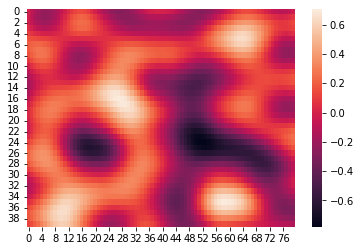

In [82]:
sns.heatmap(grid)

In [83]:
interpgrid = np.interp(grid, [grid.min(), grid.max()], [0, 4])

<AxesSubplot:>

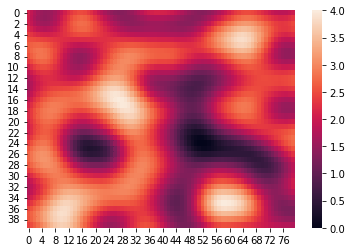

In [84]:
sns.heatmap(interpgrid)

In [85]:
interpgrid = np.round(interpgrid).astype(int)

<AxesSubplot:>

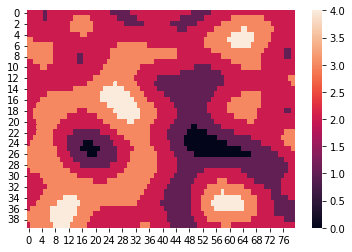

In [86]:
sns.heatmap(interpgrid)

In [70]:
interpgrid

array([[3, 2, 2, ..., 3, 3, 3],
       [3, 3, 2, ..., 3, 3, 3],
       [3, 3, 2, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [3, 2, 2, ..., 2, 2, 2]])